In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv("CC GENERAL.csv")


In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
d=data.head
d

<bound method NDFrame.head of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  P

In [5]:
#preprocessing 
data.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
n=data.isnull().sum().sum()
if(n==0):
    print("our data is ready to be used")
else:
    print("No! there are :",n,"total null values")
    #we check if there are any null values
    for col in data.columns:
        #if a column doesnt have any null values then there is no point processing it
        if(data[col].isnull().sum()>0):
            if(str(data.dtypes[col]) in ["int64","float64","int32","float32"]):
                #if our data numerical (is either float or int) 
                print(col,"before",data[col].isnull().sum())
                data[col].fillna(data[col].mean(),inplace=True)
                print(col,"after",data[col].isnull().sum())
            elif (str(data.dtypes[col])=="object"):
                #if our data is categorical (is an object)
                a=data[col].mode()
                a
                l=len(a)
                s=a[l-1]
                print(s)
                print(col,"before",data[col].isnull().sum())
                data[col].fillna(s,inplace=True)
                print(col,"after",data[col].isnull().sum())
    print("our data should now be ready to be used.")   

No! there are : 314 total null values
CREDIT_LIMIT before 1
CREDIT_LIMIT after 0
MINIMUM_PAYMENTS before 313
MINIMUM_PAYMENTS after 0
our data should now be ready to be used.


In [22]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
d=data.drop('CUST_ID',axis=1)
clust_labels=model.fit_predict(d)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
labels=pd.DataFrame(clust_labels)
labels['label']=labels
labels['label'].unique()

array([0, 2, 4, 1, 3], dtype=int64)

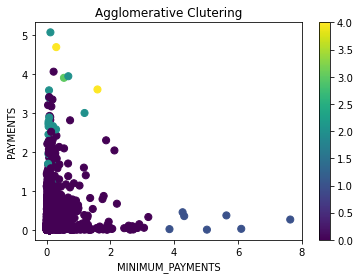

In [8]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['MINIMUM_PAYMENTS']/10000 , data ["PAYMENTS"]/10000 , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("MINIMUM_PAYMENTS")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

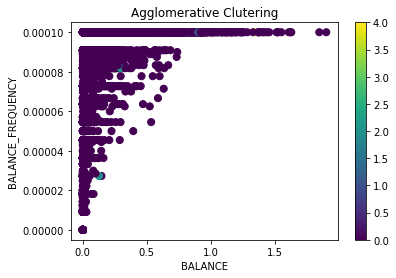

In [9]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE']/10000 , data ["BALANCE_FREQUENCY"]/10000 , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("BALANCE_FREQUENCY")
plt.colorbar(scatter)

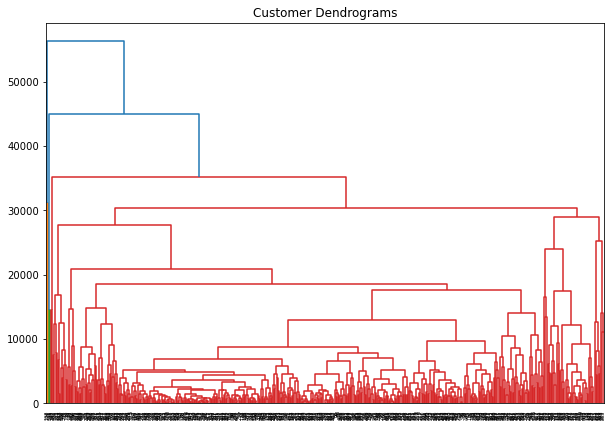

In [10]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(d.iloc[0:500,0:], method="complete"))

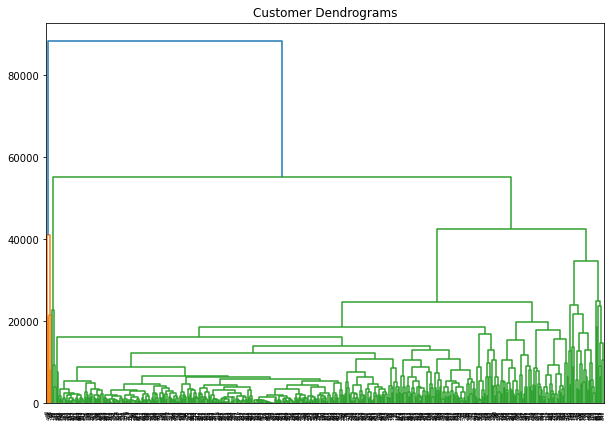

In [11]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(d.iloc[501:1000,0:], method="complete"))

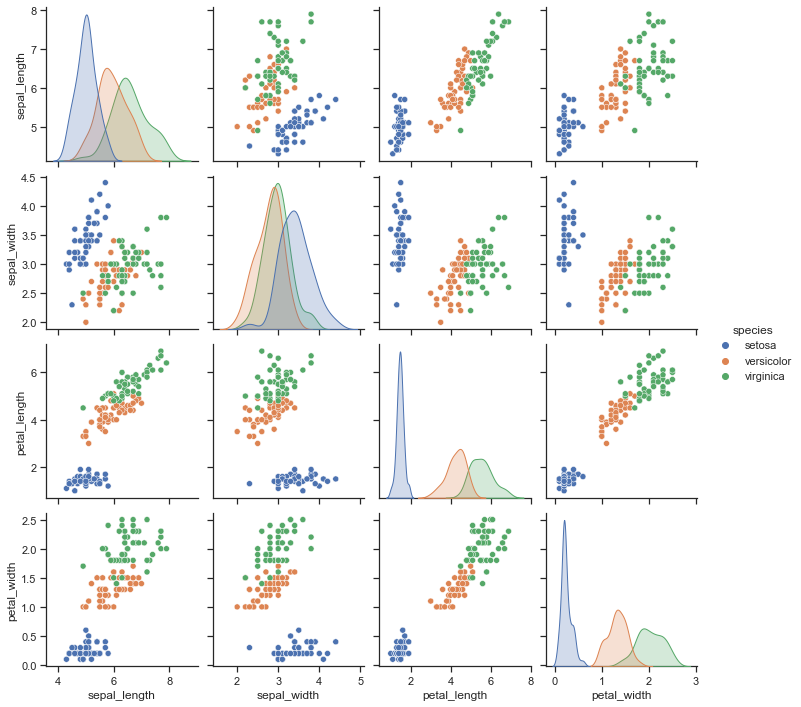

In [12]:
import seaborn as sns
sns.set_theme(style="ticks")

df = pd.read_csv("iris.csv")
sns.pairplot(df, hue="species")

In [24]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(d)
labels['label']=pd.DataFrame(kmeans.labels_)
labels

,0,label
0,0,0
1,0,4
2,0,4
3,0,4
4,0,0
...,...,...
8945,0,0
8946,0,0
8947,0,0
8948,0,0


In [14]:
kmeans.predict(d)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[7.87525310e+02 8.49448814e-01 5.09892313e+02 2.49369084e+02
  2.60819413e+02 4.83252005e+02 4.51462729e-01 1.30904213e-01
  3.47030392e-01 1.09189353e-01 2.28054545e+00 9.50563636e+00
  2.22747849e+03 9.04173576e+02 5.26793626e+02 1.48620153e-01
  1.13792727e+01]
 [5.48720526e+03 9.54910300e-01 2.40789541e+03 1.55343184e+03
  8.54576730e+02 4.13952954e+03 5.31917954e-01 3.25465421e-01
  4.01272510e-01 3.11313742e-01 9.66793893e+00 3.05114504e+01
  1.13739880e+04 5.66199017e+03 1.97499024e+03 1.07193598e-01
  1.17302799e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [5.14958549e+03 9.04434585e-01 1.95473678e+04 1.43043888e+04
  5.24297902e+03 4.86981405e+03 8.28861756e-01 6.90243927e-01
  6.98373976e-01 1.40243878e-01 7.80487805e+00 1.10658537e+02
  1.48926829e+04

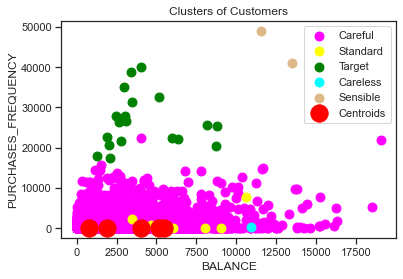

In [23]:
plt.scatter(d["BALANCE"][labels['label'] == 0],          
            d["PURCHASES"][labels['label']  == 0],s=80,c='magenta',label='Careful')
plt.scatter(d["BALANCE"][labels['label']  == 1],
           d["PURCHASES"][labels['label']  == 1],s=80,c='yellow',label='Standard')
plt.scatter(d["BALANCE"][labels['label']  == 2],
           d["PURCHASES"][labels['label']  == 2],s=80,c='green',label='Target')
plt.scatter(d["BALANCE"][labels['label']  == 3], 
           d["PURCHASES"][labels['label']  == 3],s=80,c='cyan',label='Careless')
plt.scatter(d["BALANCE"][labels['label']  == 4], 
           d["PURCHASES"][labels['label']  == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES_FREQUENCY')
plt.legend()
plt.show()